In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
def minmax(fmin,fmax):
    ran = [0,len(f)-1]
    for i in range(len(f)):
        if f[i]<fmin:
            ran[0]=i
        if f[i]>fmax:
            ran[1] = i
            break
    return ran

In [4]:
file = [0 for i in range(20)]

file[0] = "Testrun1"
file[1] = "CoarseMeasurementGroundFreq"
file[2] = "CoarseMeasurementGroundFreq2"
file[3] = "CoarseMeasurementGroundFreq3"
file[4] = "CoarseMeasurementGroundFreq4"
file[5] = "CoarseMeasurementGroundFreq5"
file[6] = "CoarseMeasurementGroundFreq6"
file[7] = "FineMeasurementGroundFreq1"
file[8] = "FineMeasurementFreq1_2"
file[9] = "CoarseMeasurementFreq2"
file[10] = "FineMeasurementFreq2_new"
#Hauptmesungen: 6,8


k = 8

adr = "/home/chaos/Dropbox/Studium/6. Semester/FP/F75 - Datenauswertung/data/" + file[k]
f, A, dA, phi, dphi = np.loadtxt(adr, usecols=(0,1,2,3,4), unpack=True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/chaos/Dropbox/Studium/6. Semester/FP/F75 - Datenauswertung/data/FineMeasurementFreq1_2'

In [5]:
ran = [0,1100]
u,o = minmax(ran[0],ran[1])

plt.figure(1)
plt.errorbar(f[u:o],A[u:o], dA[u:o], linestyle='None')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [V]')
plt.title(file[k]+"-Amplitude")
plt.savefig('figures/'+file[k]+'amp.pdf', format="PDF")

plt.figure(2)
plt.errorbar(f[u:o],phi[u:o], dphi[u:o], linestyle='None')
plt.title(file[k]+"-Phase")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [rad]')
plt.savefig('figures/'+file[k]+'phase.pdf', format="PDF")

plt.figure(3)
plt.plot(f[u:o],A[u:o]*np.cos(phi[u:o]))
plt.plot(f[u:o],[0 for i in range(len(f[u:o]))])
plt.title(file[k]+"-A*cos(phi)")
plt.xlabel('Frequency [Hz]')
plt.ylabel('A*cos(phi)')
plt.savefig('figures/'+file[k]+'acos.pdf', format="PDF")


NameError: name 'f' is not defined

In [6]:
# Fit

fitrange = [0,1000]
u,o = minmax(fitrange[0],fitrange[1])

#Fit
def lorenz(f, omega0, A0, gamma):
    return A0/(np.sqrt((omega0**2-f**2)**2+gamma**2*f**2))
popt, pcov = curve_fit(lorenz, 2*f[u:o], A[u:o],p0=[160,0.000012,1],sigma=dA[u:o])

#Plot
plt.figure(1)
plt.plot(2*f[u:o], lorenz(2*f[u:o], *popt),linewidth=1)
plt.errorbar(2*f[u:o],A[u:o], dA[u:o], linestyle='None',color="red")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [V]')
plt.title(file[k]+"-Amplitude+Fit")
plt.savefig('figures/'+file[k]+'fit.pdf', format="PDF")

#Residuals
plt.figure(2)
plt.scatter(2*f[u:o],(A[u:o]-lorenz(2*f[u:o], *popt))/dA[u:o],linestyle='None')
plt.xlabel('Frequency [Hz]')
plt.ylabel('residuals')
plt.title(file[k]+"-residual")
plt.savefig('figures/'+file[k]+'residuals.pdf', format="PDF")


#Chi2
chi2_= np.sum((lorenz(2*f[u:o],*popt)-A[u:o])**2/dA[u:o]**2)
dof = len(A[u:o])-3 #degrees of freedom
chi2_red=chi2_/dof
print("chi2_red=",chi2_red)
from scipy.stats import chi2
prob = round(1-chi2.cdf(chi2_, dof), 2)*100
print("Fitwahrscheinlichkeit:",prob,"%")


#Werte
omega0 = abs(popt[0])
domega0 = np.sqrt(pcov[0][0])
gamma = abs(popt[2])
dgamma = np.sqrt(pcov[2][2])
Q1 = abs(omega0/gamma)
dQ1 = Q1*np.sqrt((domega0/omega0)**2+(dgamma/gamma)**2)
omegaR = abs(omega0*np.sqrt(1-1/(2*Q1**2)))
domegaR = np.sqrt((np.sqrt(1-1/(2*Q1**2))*domega0)**2+(omega0*dQ1/(Q1**3*np.sqrt(4-2/Q1**2)))**2)


print("omega0=",omega0,"+-",domega0)
print("gamma=",gamma,"+-",dgamma)
print("Q=",Q1,"+-",dQ1)
print("omegaR=", omegaR,"+-",domegaR)

#Gütebestimmung aus Acos(phi)
df = abs(2*f[np.argmax(A[u:o]*np.cos(phi[u:o]))]-2*f[np.argmin(A[u:o]*np.cos(phi[u:o]))])/2
Q2 = omegaR/(2*df)
print("Q2=",Q2)

NameError: name 'f' is not defined

In [ ]:
#Temperaturmessungen

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [79]:
file = [0 for i in range(20)]

file[0] = "0,000000E+0"
file[1] = "8,000000E-2"
file[2] = "1,600000E-1"
file[3] = "2,400000E-1"
file[4] = "3,200000E-1"
file[5] = "4,000000E-1"
file[6] = "4,800000E-1"
file[7] = "5,600000E-1"
file[8] = "6,400000E-1"
file[9] = "7,200000E-1"
file[10] = "8,000000E-1"
file[11] = "8,800000E-1"


nfiles = 12
#k = 6
    
adr = [("/home/chaos/Dropbox/Studium/6. Semester/FP/F75 - Datenauswertung/data/TempMessung/" + file[k]) for k in range(nfiles)]
f = [0 for i in range(nfiles)]
A = [0 for i in range(nfiles)]
dA = [0 for i in range(nfiles)]
phi = [0 for i in range(nfiles)]
dphi = [0 for i in range(nfiles)]
Temp = [0 for i in range(nfiles)]
dTemp = [0 for i in range(nfiles)]
T = [0 for i in range(nfiles)]
dT = [0 for i in range(nfiles)]


for i in range(nfiles):
    f[i], A[i], dA[i], phi[i], dphi[i], Temp[i], dTemp[i] = np.loadtxt(adr[i], usecols=(0,1,2,3,4,5,6), unpack=True)
    
for i in range(nfiles):
    T[i] = Temp[i][np.argmax(A[i])]
    dT[i] = dTemp[i][np.argmax(A[i])]

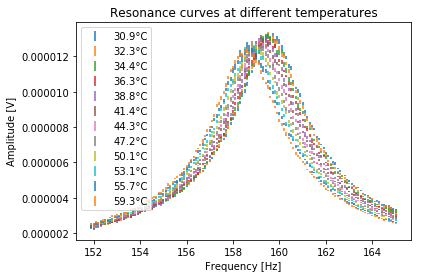

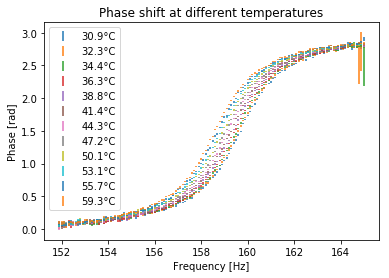

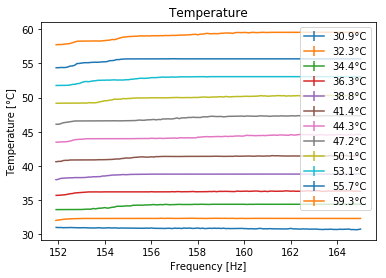

In [80]:
#plt.title(file[k]+"-Amplitude")
#plt.savefig('figures/'+file[k]+'amp.pdf', format="PDF")

fitrange = [152,165]

plt.figure(1)
for i in range(nfiles):
    plt.title('Resonance curves at different temperatures')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [V]')
    u,o = minmax(fitrange[0],fitrange[1],f[i])
    plt.errorbar(f[i][u:o],A[i][u:o],dA[i][u:o], label=str(round(T[i],1))+"°C", linestyle='None')
    plt.legend()
    plt.savefig('figures/ResonanceTemp.pdf', format="PDF")

plt.figure(2)
for i in range(nfiles):
    plt.title('Phase shift at different temperatures')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Phase [rad]')
    u,o = minmax(fitrange[0],fitrange[1],f[i])
    plt.errorbar(f[i][u:o],phi[i][u:o],dphi[i][u:o],label=str(round(T[i],1))+"°C", linestyle='None')    
    plt.legend()
    plt.savefig('figures/PhaseTemp.pdf', format="PDF")


plt.figure(3)
for i in range(nfiles):
    plt.title('Temperature')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Temperature [°C]')
    u,o = minmax(fitrange[0],fitrange[1],f[i])
    plt.errorbar(f[i][u:o],Temp[i][u:o],dTemp[i][u:o],label=str(round(T[i],1))+"°C")    
    plt.legend()
    plt.savefig('figures/TempTemp.pdf', format="PDF")

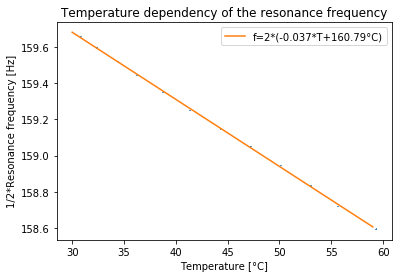

In [84]:
def lorenz(f, omega0, A0, gamma):
    return A0/(np.sqrt((omega0**2-f**2)**2+gamma**2*f**2))
omega0=[0 for i in range(nfiles)]
domega0=[0 for i in range(nfiles)]
gamma = [0 for i in range(nfiles)]
dgamma = [0 for i in range(nfiles)]
Q1 = [0 for i in range(nfiles)]
dQ1 = [0 for i in range(nfiles)]
omegaR = [0 for i in range(nfiles)]
domegaR = [0 for i in range(nfiles)]

for i in range(nfiles):
    fitrange = [152,165]
    u,o = minmax(fitrange[0],fitrange[1],f[i])
    popt, pcov = curve_fit(lorenz, f[i][u:o], A[i][u:o],p0=[160,0.000012,1],sigma=dA[i][u:o])
    
    omega0[i] = abs(popt[0])
    domega0[i] = np.sqrt(pcov[0][0])
    gamma[i] = abs(popt[2])
    dgamma[i] = np.sqrt(pcov[2][2])
    Q1[i] = abs(omega0[i]/gamma[i])
    dQ1[i] = Q1[i]*np.sqrt((domega0[i]/omega0[i])**2+(dgamma[i]/gamma[i])**2)
    omegaR[i] = abs(omega0[i]*np.sqrt(1-1/(2*Q1[i]**2)))
    domegaR[i] = np.sqrt((np.sqrt(1-1/(2*Q1[i]**2))*domega0[i])**2+(omega0[i]*dQ1[i]/(Q1[i]**3*np.sqrt(4-2/Q1[i]**2)))**2)
    
plt.errorbar(T,omega0,xerr = dT, yerr = domega0, linestyle = 'None')

#file = open("test.txt", "w")
#for i in range(len(T)):
#    line = str(T[i]) + "\t" + str(dT[i]) + "\t" + str(omega0[i]) + "\t" + str(domega0[i]) + "\n"
#    file.write(line) 
#file.close()

n = np.arange(30, 60, 1)
plt.plot(n,-0.37004E-01*n+160.79,label="f=2*(-0.037*T+160.79°C)")
plt.title('Temperature dependency of the resonance frequency')
plt.ylabel('1/2*Resonance frequency [Hz]')
plt.xlabel('Temperature [°C]')
plt.legend()
plt.savefig('figures/TempFreq.pdf', format="PDF")


In [78]:
def minmax(fmin,fmax,f):
    ran = [0,len(f)-1]
    for i in range(len(f)):
        if f[i]<fmin:
            ran[0]=i
        if f[i]>fmax:
            ran[1] = i
            break
    return ran